In [5]:
import math

class Value:
    def __init__(self,data,_children=(),_op="",_label=''):
        self.data = data
        self.grad = 0.0
        #backpropagation function which back propagates the
        #gradient to the previous node
        #for the current node it does nothing
        
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self._label = _label
        
    def __repr__(self):
        return f"Value(data)={self.data}"
    
    def __add__(self,other):
        
        other = other if isinstance(other,Value) else Value(other)
        
        #for the previous node we need pass back the grad
        #through a backward function 
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
            
        out = Value(self.data + other.data,(self,other),'+')
        out._backward = _backward
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        
        #for the previous node we need pass back the grad
        #through a backward function 
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out = Value(self.data * other.data, (self,other),'*')
        out._backward = _backward
        return out
    
    def __rmul__(self,other):
        out = self * other
        return out
    
    def __sub__(self,other):
        
        other = other if isinstance(other,Value) else Value(other)
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += -1.0 * out.grad
        
        out = Value(self.data - other.data,(self,other),'-')
        out._backward = _backward
        return out
        
    def __truediv__(self,other):
        
        return (self * other**-1)
    
    def __pow__(self,other):
        #make sure other is int/float, nothing else
        #we can use assert
        assert isinstance(other,(int,float)), "supporting only float and int"
        out = Value(self.data**other,(self,),f"**{other}")
        
        def _backward():
            #d/dx(x**n)= nx**(n-1)
            self.grad = (other * (self.data**(other-1))) * out.grad
            
        out._backward = _backward
        return out
    
    def exp(self):
        
        x = self.data
        t = math.exp(x)
        out = Value(t,(self,),'ex')
        #for the previous node we need pass back the grad
        #through a backward function 
        def _backward():
            self.grad = out.data * out.grad
            
        out._backward = _backward
        return out
    
    def tanh(self):
        # e2x - 1 / e2x + 1
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t,(self,),'tanh')
        #for the previous node we need pass back the grad
        #through a backward function 
        def _backward():
            self.grad = (1 - t**2) * out.grad
            
        
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
            topo.append(v)
            
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()
    
 
        

In [6]:
a = Value(3.0,_label='a')
a += 1

a

b = 2.0

c = b * a

c**2.0

Value(data)=64.0

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [9]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f }" % (n._label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

In [10]:
def lol():

    h = 0.001
    
    a = Value(2.0,_label='a')
    b = Value(-3.0,_label='b')
    c = Value(10.0,_label='c')
    d = a*b; d._label='d'
    e = d + c; e._lable='e'
    f= Value(-2.0,_label='f')
    L = e * f ; L._label='L'

    L1 = L.data

    a = Value(2.0,_label='a')
    
    b = Value(-3.0,_label='b')
    c = Value(10.0,_label='c')
    
    d = a*b; d._label='d'
    e = d + c; e._lable='e'
    f= Value(-2.0,_label='f')
    L = e * f ; L._label='L'
    
    L2 = L.data + h
    
    L = (L2-L1)/h
    print(L)
    


In [11]:
def derivative(var):
    varList={'a':a,'b':b,'c':c,'d':d,'e':e,'f':f}
    
    h = 0.001
    
    a = Value(2.0,_label='a')
    b = Value(-3.0,_label='b')
    c = Value(10.0,_label='c')
    d = a*b; d._label='d'
    e = d + c; e._lable='e'
    f= Value(-2.0,_label='f')
    L = e * f ; L._label='L'

    L1 = L.data

    
    
    a = Value(2.0,_label='a')
    
    b = Value(-3.0,_label='b')
    c = Value(10.0,_label='c')
    
    d = a*b; d._label='d'
    e = d + c; e._lable='e'
    f= Value(-2.0,_label='f')
    L = e * f ; L._label='L'
    
    L2 = L.data + h
    
    L = (L2-L1)/h
    print(L)
    

In [12]:
lol()

1.000000000000334


In [13]:
x = 2.0
y = 3.0

x/y

0.6666666666666666

In [14]:
    a = Value(2.0,_label='a')
    b = Value(-3.0,_label='b')
    c = Value(10.0,_label='c')
    e = a*b; e._label='e'
    d = e + c; d._label='d'
    f= Value(-2.0,_label='f')
    L = d * f ; L._label='L'


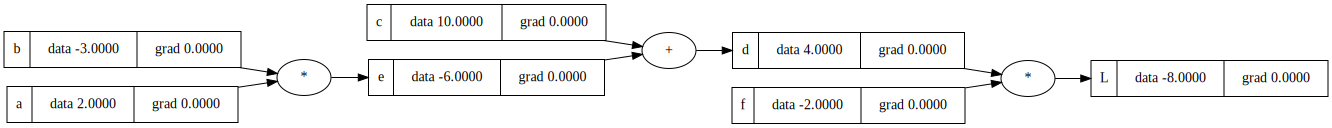

In [15]:
draw_dot(L)

In [16]:
L.grad = 1.0

f.grad = 4.0 # L = e * f ; df/dL = e 
d.grad = -2.0 # L = e * f ; de/dL = f

e.grad = -2.0  # L = ((a * b) + c ) * f = (d + c ) * f ; dL/dd = f = -2
c.grad = -2.0  # L = ((a * b) + c ) * f = (d + c ) * f ; dL/dc = f = -2

b.grad = -4.0        # L = ((a * b) + c ) * f = (a*b)*f + c*f ; dL/db = a*f, dL/da = b*f
a.grad = 6.0



In [17]:


a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad

f.data += 0.01 * f.grad

e = a * b
d = e + c

L = d * f

print(L)

Value(data)=-7.286496


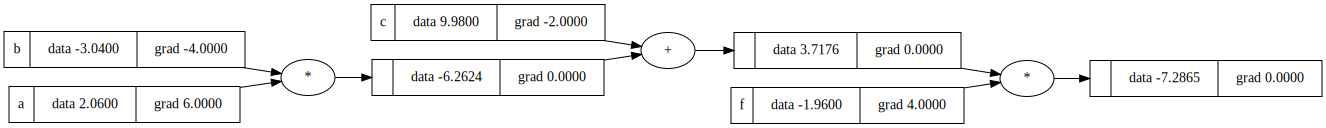

In [18]:
draw_dot(L)

In [19]:
#lets define a neuron
#input values x1,x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')

#weights
w1 = Value(-3.0,_label='w1')
w2 = Value(1.0,_label='w2')

#bias
b = Value(6.8814,_label = 'b')

# x1w1 + x2w2 + b

x1w1 = x1 * w1; x1w1._label='x1w1'
x2w2 = x2 * w2; x2w2._label='x2w2'

x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2._label='x1w1 + x2w2'

n = x1w1x2w2 + b; n._label='x1w1 + x2w2 + b'

o = n.tanh();o._label='o'
o.grad = 1.0

In [20]:
o.backward()

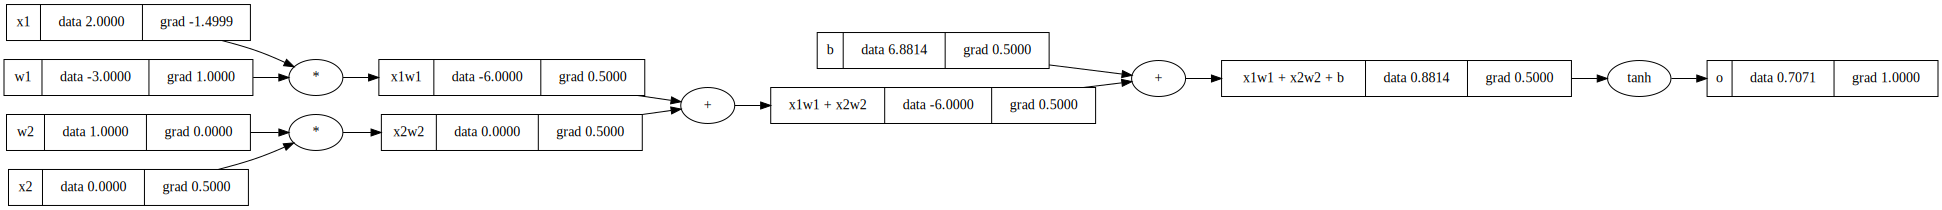

In [21]:
draw_dot(o)

In [22]:
#lets define a neuron
#input values x1,x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')

#weights
w1 = Value(-3.0,_label='w1')
w2 = Value(1.0,_label='w2')

#bias
b = Value(6.8814,_label = 'b')

# x1w1 + x2w2 + b

x1w1 = x1 * w1; x1w1._label='x1w1'
x2w2 = x2 * w2; x2w2._label='x2w2'

x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2._label='x1w1 + x2w2'

n = x1w1x2w2 + b; n._label='x1w1 + x2w2 + b'

#e**2x = e**x*e**x
e = (2*n).exp()

o = (e - 1)/(e+1);o._label='o'

o.grad = 1.0
o.backward()

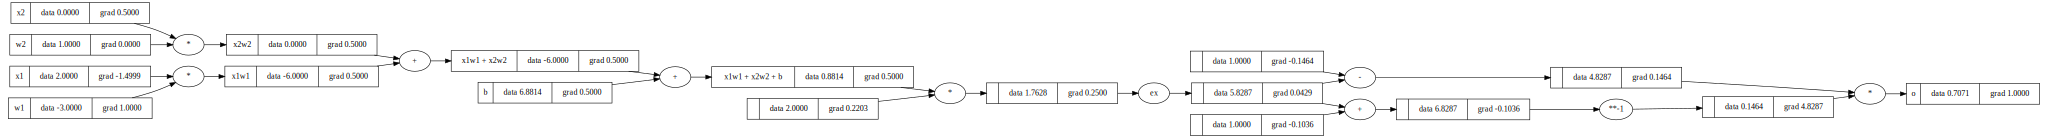

In [23]:
draw_dot(o)

In [24]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [25]:


import torch

#lets define a neuron
#input values x1,x2
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad=True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad=True

#weights
w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad=True
w2 = torch.Tensor([1.0]).double()  ; w2.requires_grad=True

#bias
b = torch.Tensor([6.8814]).double() ; b.requires_grad=True

n = x1*w1 + x2*w2 + b
output = torch.tanh(n)

print(output.data.item())
#print(o.grad)
output.backward()




0.7071200415967962


In [26]:
print('x1 grad : ',x1.grad.item())
print('w1 grad : ',w1.grad.item())
print('x2 grad : ',x2.grad.item())
print('w2 grad : ',w2.grad.item())


x1 grad :  -1.4999437403164357
w1 grad :  0.9999624935442905
x2 grad :  0.4999812467721452
w2 grad :  0.0


In [27]:
import random
class Neuron:
    def __init__(self,nin):
        #nin gives the number of inputs. the Neuron should define
        #that many random weights
        self.w = [Value(random.uniform(-1,1)) for _ in range (nin)]
        self.b = Value(random.uniform(-1,1))
                       
    def __call__(self,x):
        #This will be called when Neuron[n] is invoked. it should ideally return
        #x*w + b
        act = sum((wi*xi for wi, xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    def __init__(self,nin,count):
        #should be a list of neurons, each neuron is of n inputs
        self.neurons = [Neuron(nin) for _ in range(count)]
        
    def __call__(self,x): #to the layer we need to pass the inputs which will be passed on to each neuron
        #each layer has list of neuron getting this input
        outs = [n(x) for n in self.neurons]
        outs =  outs[0] if (len(outs) == 1) else outs
        return outs
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    
            
# lets form the MLP -Multi Layer Perceptron
# MLP is similar to Layer structure but the out put is a list of layers
class MLP:
    def __init__(self,nin,nOuts):
        #should be a list of Layers, 
        #for each layer nin - number of input will be different 
        #for e.g if layer structure is [4,4,1] which input layer having 3 neurons
        #layer1 will get 3 input, layer 2 will get 4 input, layer3/output layer will get 4 inputs
        # sz = [3,4,4]
        sz = [nin] + nOuts # this will give us a list like [3,4,4,1] we won't use the last value
        
        # sz = [3,4,4,1]
        #1st layer will have 3 input, 4 output Layer[3,4]
        #2nd layer will have 4 input, 4 output Layer [4,4]
        #3rd/output layer will have 4 input, 1 output Layer[4,1]
        #in general each layer will be Layer[sz[i],sz[i+1]]
        self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nOuts))]
        
    def __call__(self,x): 
        # for each layer we need calculate
        # output of one layer should be fed to output of next layer
        for layer in self.layers:
            x = layer(x)
                 
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]   

In [28]:
x = [2.0,3.0,-1.0]

# our layer structure is [4,4,1]
n = MLP(3,[4,4,1])
n(x)



Value(data)=0.9265217294110409

In [29]:
n.parameters()

[Value(data)=0.1346003156016613,
 Value(data)=0.9995415482538579,
 Value(data)=-0.7687780319805557,
 Value(data)=0.9339766146155914,
 Value(data)=0.9520144313967245,
 Value(data)=0.5000882965450353,
 Value(data)=0.7792531061739847,
 Value(data)=0.9917633405110027,
 Value(data)=0.30876784825180215,
 Value(data)=0.439364676815025,
 Value(data)=-0.8522863141952746,
 Value(data)=-0.5548393505617739,
 Value(data)=0.9050702453544905,
 Value(data)=0.5263901520119179,
 Value(data)=0.7434842545339253,
 Value(data)=0.17143596019837082,
 Value(data)=-0.8251345125465535,
 Value(data)=-0.9559154152528595,
 Value(data)=0.04569245876666539,
 Value(data)=0.3678164147303795,
 Value(data)=0.034887026747077776,
 Value(data)=-0.8630563292840518,
 Value(data)=0.16202912043867967,
 Value(data)=-0.4852051888104223,
 Value(data)=0.5105748273830673,
 Value(data)=-0.11873105548443941,
 Value(data)=-0.48821063359273964,
 Value(data)=0.7242372875372014,
 Value(data)=-0.5813356777762719,
 Value(data)=-0.3042652685

In [30]:
len(n.parameters())

41

In [31]:
xs = [
     [2.0,3.0,-1.0],
     [3.0,-1.0,0.5],
     [0.5,1.0,1.0],
     [1.0,1.0,-1.0]]
    
ys = [1.0,-1.0,-1.0,1.0]
n = MLP(3,[4,4,1])
ypred = [n(x) for x in xs]
ypred

[Value(data)=0.9841315657379491,
 Value(data)=0.9850593894861148,
 Value(data)=0.9898933364059463,
 Value(data)=0.9819357785672452]

In [32]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys,ypred)],Value(0.0))
print(loss)

Value(data)=7.900714393361676


In [33]:
n.layers[0].neurons[0].w[0]
n.layers[0].neurons[0].w[0].grad

0.0

In [34]:
loss.backward()

In [35]:

n.layers[0].neurons[0].w[0].grad


-0.03377381518531945

In [36]:
print(n.layers[0].neurons[0].w[0].data)
print(n.layers[0].neurons[0].w[1].data)
print(n.layers[0].neurons[0].w[2].data)


-0.8476902267677375
-0.8509736941102262
0.576735387412161


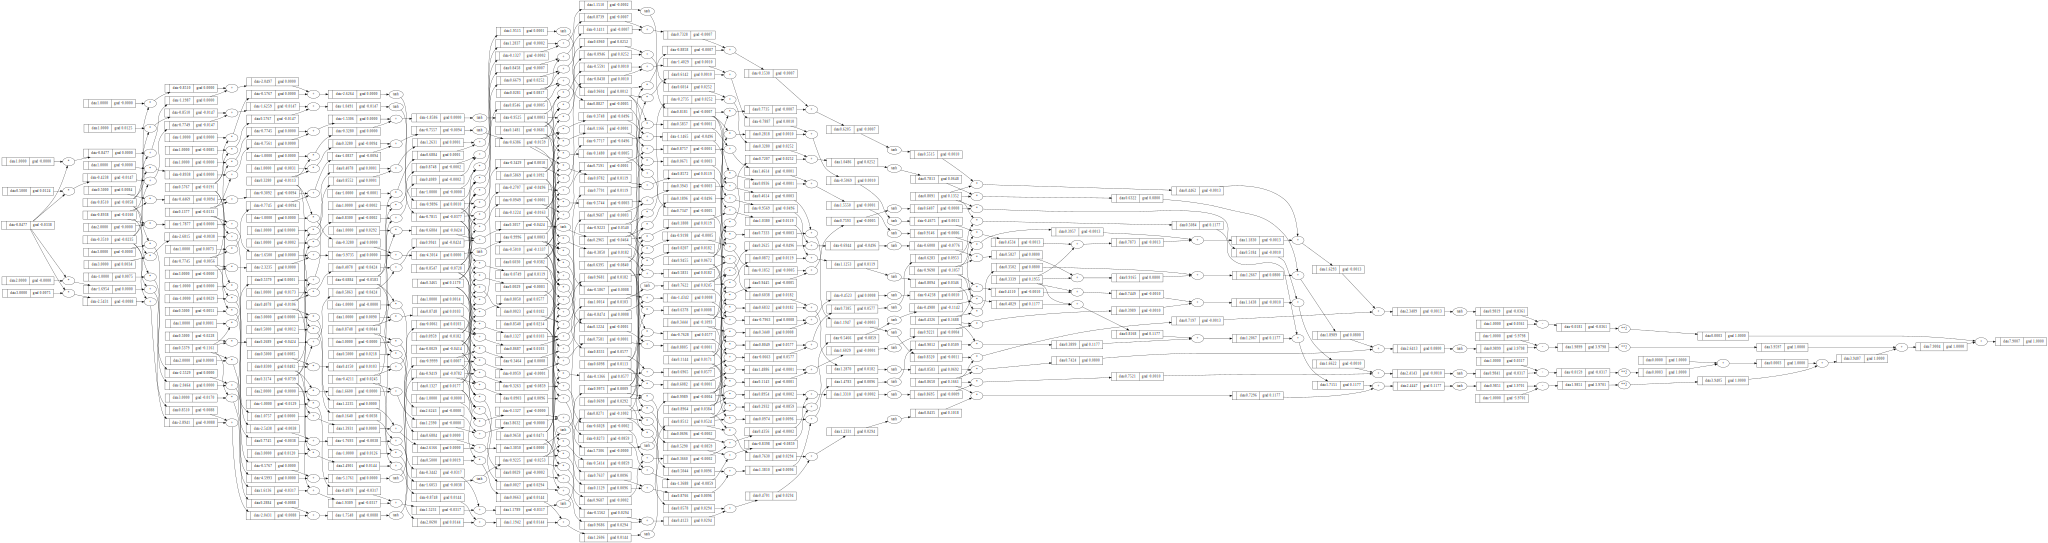

In [39]:
draw_dot(loss)

In [40]:
xs = [
     [2.0,3.0,-1.0],
     [3.0,-1.0,0.5],
     [0.5,1.0,1.0],
     [1.0,1.0,-1.0]]
    
ys = [1.0,-1.0,-1.0,1.0]
n = MLP(3,[4,4,1])
#ypred = [n(x) for x in xs]
#ypred

In [41]:
#the below 3 forward pass, backward pass, update on weights go through iterations so that loss is minimal

In [58]:
#forward pass
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys,ypred)],Value(0.0))
print(loss)

Value(data)=3.8432590310127557


In [59]:
#backward pass
loss.backward()

In [60]:
#update on weights
for p in n.parameters():
    p.data += -0.01 * p.grad

In [61]:
ypred

[Value(data)=0.17676843943907433,
 Value(data)=0.21430774080165796,
 Value(data)=-0.11413677381368287,
 Value(data)=0.04802737233199701]